### 数据集

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
w,b = 1.8,2.5

In [7]:
np.random.seed(86)
x = np.random.rand(100)*4 - 2
# np.random.rand(100):生成100个介于0（含）到1（不含）之间的均匀分布随机数
noise = np.random.randn(100)/3
y = w*x + b + noise

In [9]:
x.shape

(100,)

In [11]:
x = x.reshape(-1,1)

In [13]:
x.shape,y.shape
# (100,) 和 (100,1)的区别：
# (100,)表示一维数组只有一个维度，包括100个元素
# (100,1)表示二维数组，有两个维度，包含100行每行一个元素

((100, 1), (100,))

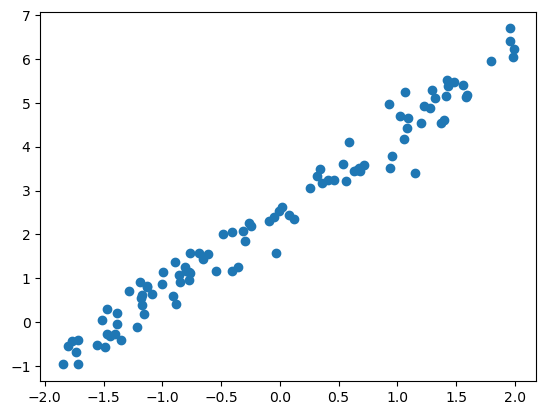

In [15]:
plt.scatter(x,y)
plt.show()

### sklearn中的神经网络

In [18]:
from sklearn.neural_network import MLPRegressor
# MLPRegressor：多层感知机回归器

In [24]:
reg = MLPRegressor(
    hidden_layer_sizes = (1,),
    # 定义隐藏层结构，这里表示模型包含一个隐藏层，且该隐藏层仅含有1个神经元
    # hidden_layer_sizes = (20,10,3)表示模型包含3个隐藏层，第一个隐藏层含有20个神经元，
    # 第二个隐藏层含有10个神经元，第3个隐藏层含有3个神经元
    activation = 'identity',
    # 设置激活函数为恒等函数
    learning_rate_init = 0.01,
    # 设置初始学习率为 0.01
    random_state = 86,
)

In [26]:
reg.fit(x,y)

MLPRegressor(activation='identity', hidden_layer_sizes=(1,),
             learning_rate_init=0.01, random_state=86)

In [30]:
reg.score(x,y)

0.9710307283048596

In [32]:
y_pred = reg.predict(x)

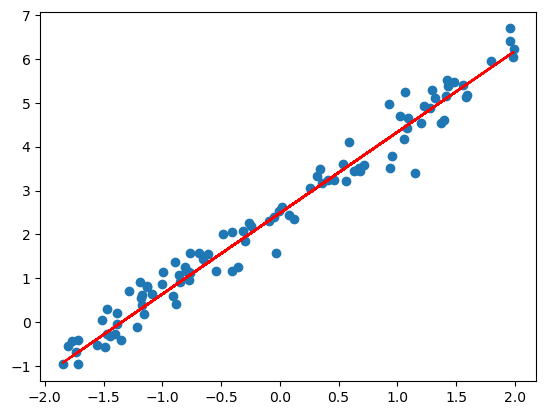

In [34]:
plt.scatter(x,y)
plt.plot(x,y_pred,c = 'red')
plt.show()

In [38]:
w1,w2 = np.array(reg.coefs_).reshape(-1)
b1,b2 = np.array(reg.intercepts_).reshape(-1)
print(w1,w2,b1,b2)

-1.3021897799716937 -1.4194345893846478 -1.0786840154752464 0.9560591057409549


In [65]:
w1 * w2, w2 * b1 + b2
# 输出层计算为  w_2*(隐藏层输出) + b_2 ，即  w_2(w_1x + b_1) + b_2
# (w_1w_2)x + (w_2b_1 + b_2)
# (w_1w_2) 为 w
# (w_2b_1 + b_2) 为 b

(1.786963935349321, 2.5163715941679135)

### 反向传播权重更新

In [68]:
w1,b1,w2,b2 = np.random.rand(4)

In [70]:
w1,b1,w2,b2

(0.6023899978979307,
 0.7725939054405293,
 0.8072991483091313,
 0.4010981446690135)

In [72]:
y_real = y.reshape(-1,1)
lr = 0.01

In [74]:
for i in range(100):
    y1 = w1 * x + b1
    y_pred = w2 * y1 + b2
    loss = ((y_real-y_pred)**2)/2

    dy = y_pred - y_real
    dy1 = dy*w2

    dw1 = np.mean(x*dy1)
    dw2 = np.mean(y1*dy)
    db1 = np.mean(dy1)
    db2 = np.mean(dy)

    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
print(w1,b1,w2,b2)
    

1.1625212766473685 1.1549517575440604 1.542437491128058 0.7461771951150036


In [76]:
y_pred = w2*(w1*x+b1)+b2

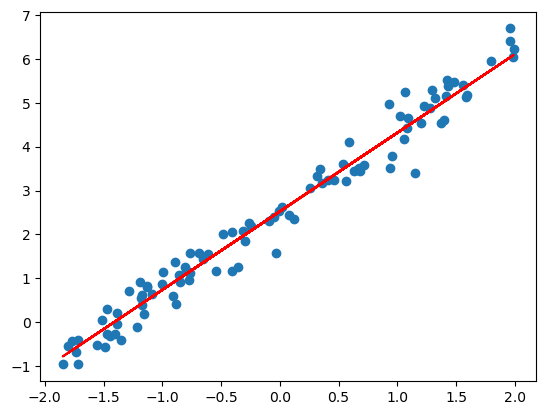

In [78]:
plt.scatter(x,y)
plt.plot(x,y_pred,c = 'red')
plt.show()

In [80]:
w1 * w2, w2 * b1 + b2

(1.793116401334954, 2.527618086395205)